In [1]:
import torch
from torchvision import datasets,transforms
from torch import nn,optim
import torch.nn.functional as F

In [2]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
dataset=datasets.FashionMNIST('./fashion_mnist',download=True,train=True,transform=transform)

Processing...
Done!


In [3]:
trainloader=torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

In [4]:
trainloader

In [9]:
dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./fashion_mnist
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

Building the network


#Creating the Classifier

In [17]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,256)   #First hidden Layer
        self.fc2=nn.Linear(256,128)   #Second hidden layer
        self.fc3=nn.Linear(128,64)    #third hidden layer
        self.fc4=nn.Linear(64,10)     #Output Layer 
        
    def forward(self,x):
        x=x.view(x.shape[0],-1)       #Shaping the Input
        x=F.relu(self.fc1(x))         #Relu activation function is used
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1)    #Softmax is used
        return x
    

In [18]:
#Create a network ,define the criterion and optimiser

model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

In [20]:
#Train the network

epochs=5
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        logps=model(images)
        loss=criterion(logps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"Training Loss:{running_loss}")

Training Loss:286.52640095353127
Training Loss:273.0289003700018
Training Loss:264.5326405316591
Training Loss:254.1202142238617
Training Loss:247.7848543152213


In [25]:
#Testing the data
test_data=datasets.FashionMNIST('./fashion_mnist',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(test_data,batch_size=64,shuffle=True)


In [26]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./fashion_mnist
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [53]:
import helper
import numpy as np
import matplotlib.pyplot as plt
dataiter_test=iter(testloader)
images,labels=dataiter_test.next()
img_1=images[4]

#Calculate the probability
probability=torch.exp(model(img_1))


#Plotting the image and probability



In [54]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)



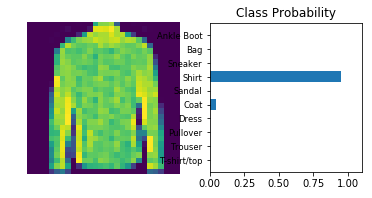

In [55]:
view_classify(img_1,probability,version="Fashion")

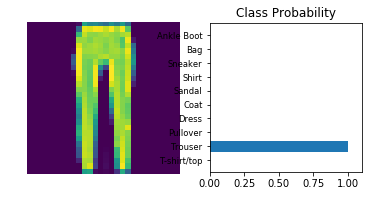

In [57]:
img_2=images[11]
probability_2=torch.exp(model(img_2))
view_classify(img_2,probability_2,version='Fashion')